In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TO AVOID FUTURE WARNINGS
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

df=pd.read_csv('diabetes.csv')
print(df.head())  # TO PRINT FIRST 5 DATA FROM THE DATASET
print(df.shape)    
print(df.Outcome.value_counts())  # THIS IS USED FOR COUNT ALL THE OUTCOME VALUES WHICH IS IN THE FORM OF 0 AND 1

# CHECKING MISSING DATA
print(df.isnull().sum())        # THIS IS USED TO CHECK IS THERE ANY NULL VALUE PRESENT OR NOT AND SUM OF ALL THE NULL VALUE OR MISSING VALUE 
 
print(df.iloc[:,1:-1].isin([0]).sum())  # THIS IS USED TO CHECK AND SUM ALL THE 0 VALUES PRESENT IN DATASET EXCEPT COLUMN[DiabetesPedigreeFunction AND Age]

# USING FOR LOOP TO REPLACE ALL THE 0 VALUE TO THE MEDIAN OF THE DATASET

for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df[col]=df[col].replace({0:df[col].median()})   



print(df.iloc[:,1:-3].isin([0]).sum()) 
print(df.head())  # HERE WE GET THE DATA WHICH DON'T HAVE ANY ZERO VALUE
df.describe()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
Outcome
0    500
1    268
Name: count, dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Ou

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
X=df.drop("Outcome",axis=1)  # FEATURE
y=df[("Outcome")]      # OUTPUT


# NOW SPLIT THE DATA INTO TRAIN AND TEST DATA
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=0)
xtrain.shape

(614, 8)

In [3]:
# RANDOM FOREST 

from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier(n_estimators=10,random_state=12)
rf.fit(xtrain,ytrain)

rf_test_score=rf.score(xtest,ytest)
rf_train_score= rf.score(xtrain,ytrain)
print("USING RANDOM FOREST - Test score is : ",rf_test_score)
print("USING RANDOM FOREST - Train score is : ",rf_train_score)


USING RANDOM FOREST - Test score is :  0.7857142857142857
USING RANDOM FOREST - Test score is :  0.9771986970684039


USING DECISIONTREE - Test score is :  0.7597402597402597
USING DECISIONTREE - Train score is :  1.0


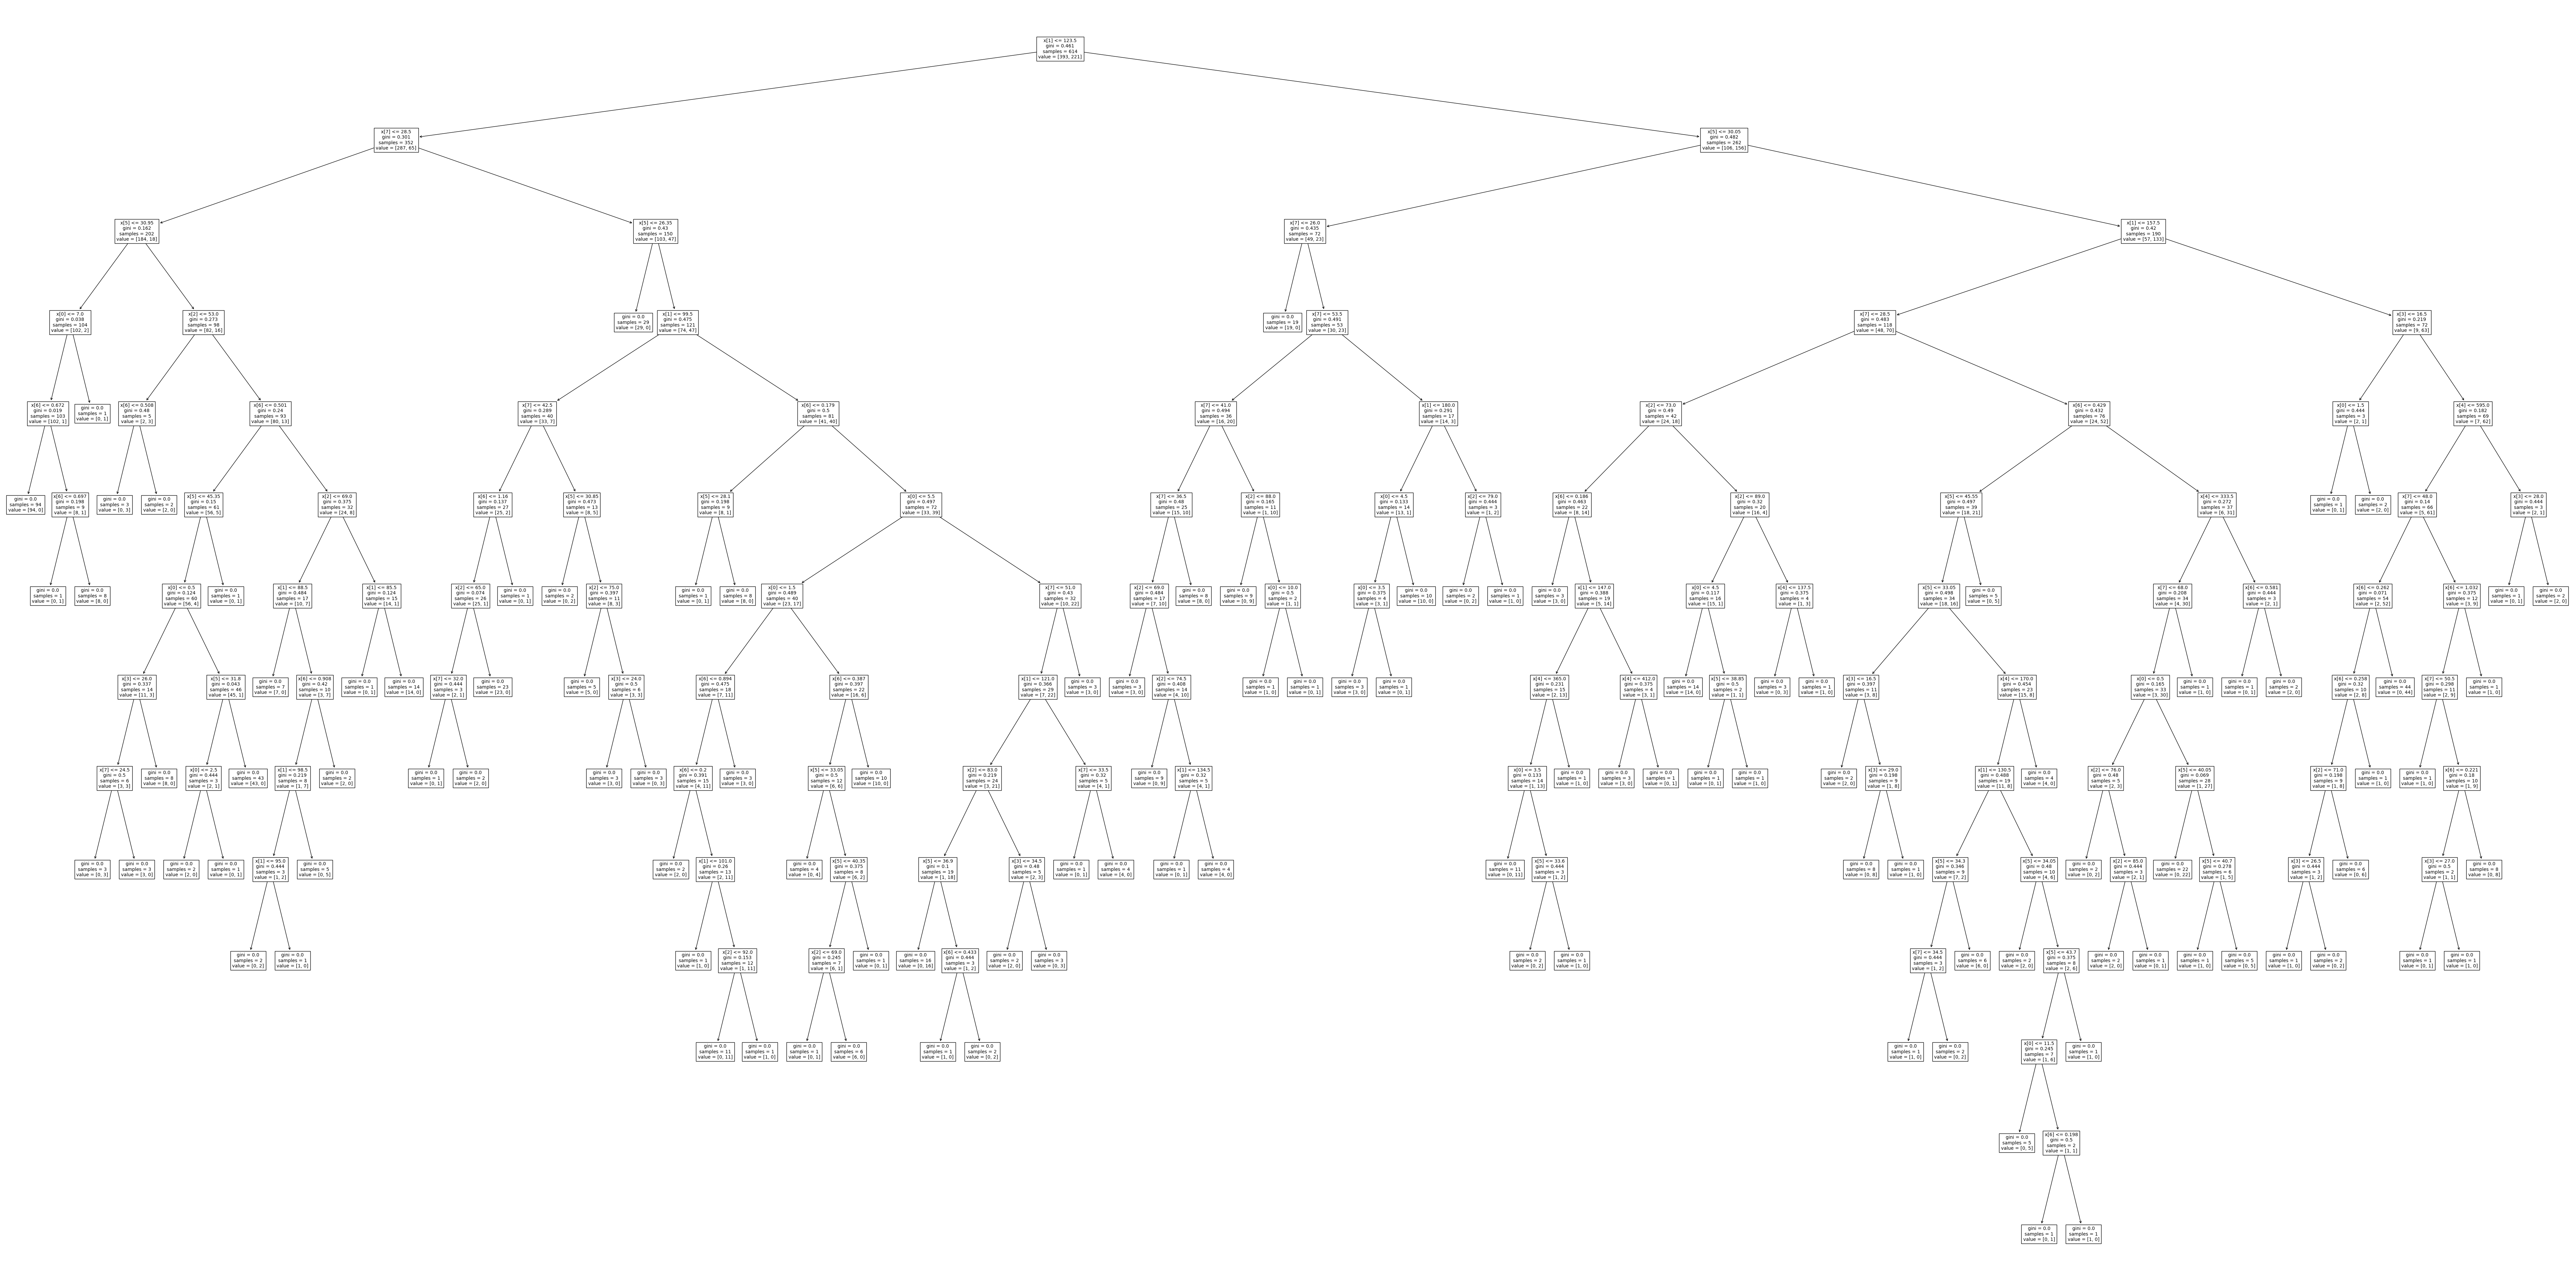

In [4]:
# USING DECISIONTREE
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

dt_test_score=dt.score(xtest,ytest)
dt_train_score=dt.score(xtrain,ytrain)

print("USING DECISIONTREE - Test score is : ",dt_test_score)

print("USING DECISIONTREE - Train score is : ",dt_train_score)

# plot the decision tree
fig,ax=plt.subplots(figsize=(100,50))

from sklearn import tree
tree.plot_tree(dt,fontsize=10)
plt.show()




In [5]:
# USING FEATURE SCALING
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std_train=std.fit_transform(xtrain)
std_test = std.transform(xtest)
std_train.shape



(614, 8)

In [7]:
#  LOGISTIC REGRESSION


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression(max_iter=1000)
lr.fit(std_train,ytrain)

pred=lr.predict(std_test)

test_score=accuracy_score(ytest,pred)

print("USING LOGISTIC REGRESSION - Test score is: ",test_score)   

train_score=accuracy_score(ytrain,lr.predict(std_train))

print("USING LOGISTIC REGRESSION - Train score is: ",train_score)

USING LOGISTIC REGRESSION - Test score is:  0.8181818181818182
USING LOGISTIC REGRESSION - Train score is:  0.7687296416938111


In [8]:
#  SVM
from sklearn.svm import SVC
clf_svm=SVC(kernel ='linear',C=10)
clf_svm.fit(std_train,ytrain)
train_score = clf_svm.score(std_train,ytrain)
test_score = clf_svm.score(std_test,ytest)


print("USING SVM - Train score is : ",train_score)
print("USING SVM - Test score is : ",test_score)


USING SVM - Train score is :  0.757328990228013
USING SVM - Train score is :  0.7987012987012987


In [9]:
#  KNN 

from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors=3) 
knn.fit(std_train,ytrain)
train_score=knn.score(std_train,ytrain)
test_score=knn.score(std_test,ytest)


print("USING KNN -Train score is : ",train_score)
print("USING KNN -Test score is : ",test_score)

USING KNN -Train score is :  0.8517915309446255
USING KNN -Train score is :  0.7467532467532467
